# Susceptibility

$$
Z = \sum_n e^{-\beta E_n}\\
m(B) = \frac{1}{\beta Z} \frac{\partial Z}{\partial B}\\
\chi = \lim_{B \to 0} \frac{\partial m}{\partial B}
$$

## Eigenvalues and eigenstates in presence of $\vec B$

### The easy ones: $n=0,1,3,4$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\Delta_{\pm} \equiv \sqrt{v^2 + (\epsilon_d \pm \frac{1}{2}B)^2}\\
\ket{0,0} \text{ and } \ket{2,2}\begin{cases} E_{0} = E_{15} = \frac{1}{4}k \end{cases}\\
\text{ between }\ket{\uparrow,0},\ket{0,\uparrow} \text{ and between }\ket{\uparrow,2},\ket{2,\uparrow}\begin{cases}
E_{1} = E_{11} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B + \Delta_{+}\right)\\
E_{2} = E_{12} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B - \Delta_{+}\right)
\end{cases}\\
\text{ between }\ket{\downarrow,0},\ket{0,\downarrow} \text{ and between }\ket{\downarrow,2},\ket{2,\downarrow}\begin{cases}
E_{3} = E_{13} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B + \Delta_{-}\right)\\
E_{4} = E_{14} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B - \Delta_{-}\right)
\end{cases}\\
$$

### The easy ones in $n=2$

$$
\ket{\uparrow, \uparrow}: E_5 = \epsilon_d + \frac{1}{4}j + \frac{1}{2}B\\
\ket{\downarrow, \downarrow}: E_6 = \epsilon_d + \frac{1}{4}j - \frac{1}{2}B\\
\ket{\text{charge triplet 0}}: E_7 = \frac{1}{4}k\\
$$

### The remaining subspace

$$
\begin{pmatrix}
    \epsilon_d+\frac{1}{4}j & B & 0\\
    B & \epsilon_d - \frac{3}{4}j & -2v\\
    0 & -2v & -\frac{3}{4}k
\end{pmatrix}
$$
The basis is: $\ket{\text{spin trip. } 0}, \ket{\text{spin singl.}}, \ket{\text{charge singl.}}$

The next step is to diagonalize this matrix.

In [1]:
import itertools
from tqdm import tqdm
from qutip import *
from time import sleep
from multiprocessing import Pool
import numpy as np
from math import *
import matplotlib
from matplotlib import pyplot as plt
import os
from itertools import product

font = {'size'   : 17}

matplotlib.rc('font', **font)
#matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 6, 4
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

## Alternate way

Okay, so keeping the $v$ and diagonalizing does not seem to be tractable. So we set $v=0$ and then diagonalize. The resultant susceptibility is

$$
\chi(\epsilon_d, k, j, \beta) = \frac{\left[4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{4}\right)}\right] \frac{1}{4}\beta + e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{4 + 3\exp\left\{-\beta \frac{k}{4}\right\} + \exp\left\{\beta \frac{3k}{4}\right\} + 4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{4}\right)} + 2e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)}\cosh \left(\beta \frac{j}{2}\right)}
$$
This has the behaviour 
$$
\frac{1}{\beta}\chi \to \frac{1}{8} \text{ when } T \to \infty
$$
and 
$$
\frac{1}{\beta}\chi \to \frac{1}{2j} \text{ when } T \to 0
$$
We can plot the susceptibility for the simpler case of $\epsilon_d=k=v=0$. It looks like
$$
	\chi(j, \beta) = \frac{\left[4 + 2e^{-\beta \frac{j}{4}}\right] \frac{1}{4}\beta + e^{\beta\frac{j}{4}} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{12 + 2e^{-\beta \frac{j}{4}} + 2e^{\beta\frac{j}{4}}\cosh \left(\beta \frac{j}{2}\right)}\\
$$

100%|██████████| 400/400 [00:01<00:00, 247.66it/s]
0.3455983575106211


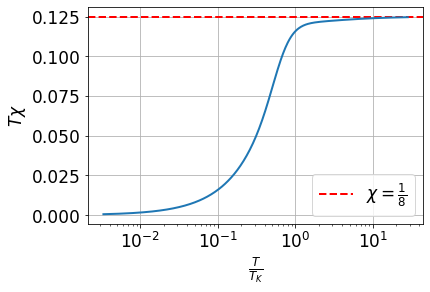

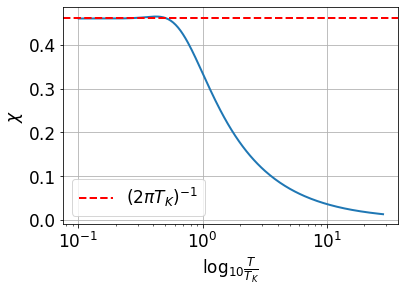

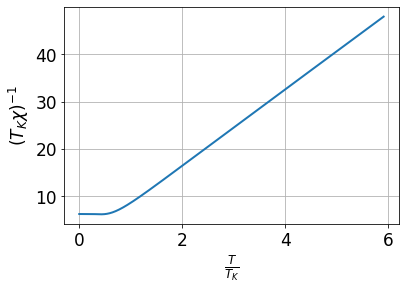

In [29]:
def get_chi(ed, j, k, T):
    #print (T+"\n")
    os.system("echo "+str(T)+" >> $HOME/status2.txt")
    beta = 1/T
    numerator = (4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2))) * beta/4 + exp(-beta * (ed - j/4)) * sinh(beta * j/2) / j
    denominator = 4 + 3 * exp(-beta * k/4) + exp(beta * 3*k/4) + 4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2)) + 2 * exp(-beta * (ed - j/4)) * cosh(beta * j/2)
    return numerator/denominator


V = 0.019909015762077577
J = 0.015838964056748835
K = 0
U = 0
count = 2
D = count / 10

D = 0.2999999999999998
U = 0
J = 0.18095487684134437
K = 0
V = 0.7941243949155348
count= 3

D0 = 5
V0 = 0.01
J0 = 0.01
K0 = 0
w = 0
U0 = 0.1

N = 2 * count
j = J * N
k = K * N
v = V * sqrt(N)
T_range = 10**np.arange(-3,1,0.01)
ed = -U/2
data = itertools.product([ed],[j],[k], T_range)
chi = []
for T in tqdm(T_range):
    chi.append(get_chi(ed, j, k, T))
chi = np.array(chi)
Tk = (j + k) / (np.pi)
print (Tk)
# plt.title(r"$\epsilon_d = v = 0, j={}, k=j/2$".format(j))
plt.axhline(1/8, 0, 1, color="r", label=r"$\chi = \frac{1}{8}$", ls="--")
plt.plot((T_range/Tk), T_range * chi)
plt.xscale("log")
plt.legend()
plt.ylabel(r"$T \chi$")
plt.xlabel(r"$\frac{T}{T_K}$")
plt.show()
plt.plot((T_range/Tk)[np.where(T_range/Tk > 0.1)], chi[np.where(T_range/Tk > 0.1)])
plt.xscale("log")
plt.axhline(1/(2*np.pi*Tk), 0, 1, color="r", label=r"$\left(2\pi T_K\right)^{-1}$", ls="--")
plt.ylabel(r"$\chi$")
plt.xlabel(r"$\log_{10}\frac{T}{T_K}$")
plt.legend()
plt.show()
# plt.title(r"$\epsilon_d = v = 0, j=1, k=\frac{j}{2}$")
plt.plot(T_range[np.where(T_range/Tk <= 6)]/Tk, 1/(Tk * chi)[np.where(T_range/Tk <= 6)])
plt.ylabel(r"$\left(T_K \chi\right)^{-1}$")
plt.xlabel(r"$\frac{T}{T_K}$")
plt.show()

## With $v$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\chi = \frac{\frac{\beta}{2} \cosh (\beta v) + \frac{1}{2v} \sinh(\beta v) + e^{-\beta\frac{1}{4}j}\frac{\beta}{2} - \frac{1}{2}\left(A_+ + A_-\right)e^{-\beta E_0} + \frac{1}{2}\sum_{\sigma=\pm}A_\sigma e^{-\beta E_\sigma}}{2 e^{-\beta \frac{k}{4}} + e^{\beta \frac{3k}{4}} + 8\cosh{\beta v} + 2e^{-\beta\frac{1}{4}j } + e^{-\beta E_0} + e^{-\beta E_+} + e^{-\beta E_-}}\\
E_0 = \epsilon_d + \frac{1}{4}j\\
E_\pm = v\left[ \gamma \pm \sqrt{\gamma^2 + 4} \right] + \epsilon_d - \frac{3}{4}j\\
A_\pm = \frac{\left( c^s_\pm \right)^2}{j - v\gamma \mp v\sqrt{4 + \gamma^2}}
$$

100%|██████████| 600/600 [00:00<00:00, 16607.49it/s]


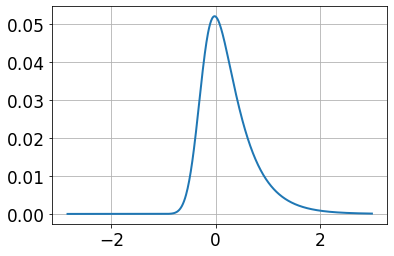

In [6]:
U = 0
j = 1
k = 0
v = 1
T_range = 10**np.arange(-3, 3, 0.01)
chi = []
for T in tqdm(T_range):
    E0 = j/4
    vgamma = ((3*j+k)/4 + U/2)/(2)
    c1sq = (sqrt(vgamma**2 + 4*v**2) + vgamma)/(2 * sqrt(vgamma**2 + 4*v**2))
    Ep = -3*j/4 + vgamma + sqrt(4*v**2 + vgamma**2)
    Em = -3*j/4 + vgamma - sqrt(4*v**2 + vgamma**2)
    Ap = c1sq/(j-vgamma - sqrt(4*v**2 + vgamma**2))
    Am = c1sq/(j-vgamma + sqrt(4*v**2 + vgamma**2))
    chi.append((np.cosh(v/T)/(2*T) + 1/(2*T) + np.exp(-j/(4*T))/(2*T) - (Ap + Am)*np.exp(-E0/T)/2 + Ap*np.exp(-Ap/T)/2 + Am*np.exp(-Am/T)/2) / (2*np.exp(-k/(4*T)) + np.exp(3*k/(4*T)) + 8*np.cosh(v/T) + 2*np.exp(-j/(4*T)) + np.exp(-E0/T) + np.exp(-Ep/T)+ np.exp(-Em/T)))

chi = np.array(chi)
# plt.axhline(1/8, 0, 1)
plt.plot(np.log10(T_range), chi)
plt.show()


## Anirban da's Kondo

In [ ]:
def get_chi_K(j, T):
    beta = 1/T
    x = beta * j/2
    return (beta/4) * (exp(-x) + sinh(x)/x)/(exp(-x) + cosh(x))

j = 10
T_range = np.arange(0.01,50,0.01)
data = itertools.product([j], T_range)
chi = np.array(Pool(processes=40).starmap(get_chi_K,data))
plt.plot(np.log10(T_range), chi)
plt.show()
plt.plot(np.log10(T_range), T_range*chi)
plt.show()

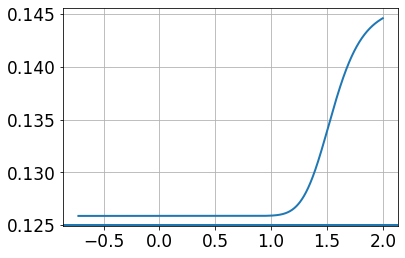

In [31]:
U_arr =  [0, 0, 0, 0, 0.06463131507519854, 0.3832892301648289, 0.81035398312819, 0.9653022499322309, 1]
J_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
K_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
V_arr =  [3.31196040544157, 0.8600731642469739, 0.40964223204281247, 0.2526301643610369, 0.17618732751694133, 0.12356402131908403, 0.06672654361752858, 0.032185777536821183, 0.02]
count_arr =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
D_arr =  [0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
D = D_arr[0]
J = J_arr[0]
K = K_arr[0]
U = U_arr[0]
# U = -0.001
V = V_arr[0]
count = count_arr[0]
N = 2 * count
j = J * N
k = K * N
v = V * sqrt(N)
v *= 10
eps = 0
delta = sqrt(2*v**2 + (U/2 + eps)**2)
gamma = (3*j + k + 2*U - 4*eps)/(8*v)
Eg = -U/2 - 3*j/4 + v * (gamma - sqrt(gamma*2 + 4))
Ep = -U/2 + eps - 3*j/4 + v * (gamma + sqrt(gamma*2 + 4))
Em = -U/2 + eps - 3*j/4 + v * (gamma - sqrt(gamma*2 + 4))
csp = sqrt(sqrt(gamma**2 + 4) - gamma)/sqrt(2*sqrt(gamma**2 + 4))
csm = sqrt(sqrt(gamma**2 + 4) + gamma)/sqrt(2*sqrt(gamma**2 + 4))
ccp = csm
ccm = -csp
evals = np.array([k/4]*2 + [-U/4 + eps/2 + delta/2, -U/4 + eps/2 - delta/2] * 4 + [-U/2 + eps + j/4]*3 + [-3*k/4] + [Ep, Em])
Szsq = np.array([0, 0] + [(1/4) * 16*v**2/(16*v**2 + (-U - 2 * delta)**2), (1/4) * 16*v**2/(16*v**2 + (-U + 2 * delta)**2)]*4 + [1/4]*3 + [0] + [(1/4) * csp**2/(csp**2 + ccp**2), (1/4) * csm**2/(csm**2 + ccm**2)])
evals_O = np.array([0]*4 + [-U/2]*8 + [0]*4)
Szsq_O = np.array([0, 1/4, 1/4, 0] + [1/4, 1, 0, 1/4]*2 + [0, 1/4, 1/4, 0])
Trange = np.arange(-2, 2, 0.001, dtype=float)
chi_T = []
chi_cb = []
for T in 10**Trange:
    kB = 1
    beta = 1/(kB * T)
    Z = sum(np.exp(-evals * beta))
    Z0 = sum(np.exp(-evals_O * beta))
    tmp1 = sum(Szsq * np.exp(-evals * beta))/Z
    tmp2 = 0.25/(1 + np.exp(beta*eps))
    tmp3 = 1/(4 + 4 * np.exp(-beta * U/2))
    # chi_J.append(tmp1)
    chi_T.append(tmp1)
# plt.plot(Trange, chi_J)
plt.plot(Trange, chi_T)
plt.axhline(1/8, 0, 1)
# plt.axhline(-1/8, 0, 1)
plt.show()

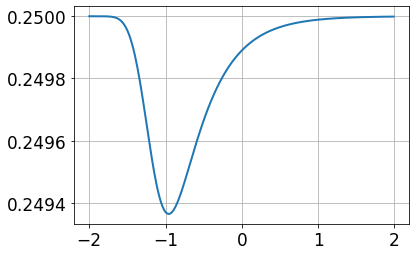

In [29]:
U_arr =  [0, 0, 0, 0, 0.06463131507519854, 0.3832892301648289, 0.81035398312819, 0.9653022499322309, 1]
J_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
K_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
V_arr =  [3.31196040544157, 0.8600731642469739, 0.40964223204281247, 0.2526301643610369, 0.17618732751694133, 0.12356402131908403, 0.06672654361752858, 0.032185777536821183, 0.02]
count_arr =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
D_arr =  [0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
D = D_arr[0]
J = J_arr[0]
K = K_arr[0]
U = U_arr[0]
V = V_arr[0]
count = count_arr[0]
N = 2 * count
j = J * N
k = K * N
v = V * sqrt(N)
delta = sqrt(2*v**2 + U**2/4)
gamma = (3*j + k + 2*U)/(8*v)
Eg = -U/2 - 3*j/4 + v * (gamma - sqrt(gamma*2 + 4))
# Eg /= 100
Cv = []
Ep = -U/2 - 3*j/4 + v * (gamma + sqrt(gamma*2 + 4))
Em = -U/2 - 3*j/4 + v * (gamma - sqrt(gamma*2 + 4))
csp = sqrt(sqrt(gamma**2 + 4) - gamma)/sqrt(2*sqrt(gamma**2 + 4))
csm = sqrt(sqrt(gamma**2 + 4) + gamma)/sqrt(2*sqrt(gamma**2 + 4))
ccp = csm
ccm = -csp
Ek = np.array([-0.2, -0.1, 0.1, 0.2])
Fk = ((J**2/(4*(Eg + J/4)**3) - 2*V**2/Eg**3)/(J**2/(4*(Eg + J/4)**2) - 2*V**2/Eg**2)) * Ek**2
Trange = 10**np.arange(-2, 2, 0.01, dtype=float)
chi = []
for T in Trange:
    kB = 1
    beta = 1/(kB * T)
    Zpp = 0
    Z = 0
    for ek, fk in zip(Ek, Fk):
        nk = 1/(1+ np.exp(beta*ek))
        Eks = ek + 2*fk*nk
        Zpp += beta**2 * exp(-beta*Eks) * (1 + beta*fk/(4*(cosh(beta*ek/2))**2))
        Z += 4 * exp(-beta * Eks)
    chi_at_T = Zpp / (beta * Z)
    chi.append(chi_at_T)
    # Zpp = 0
    # Z = 0
    # for ek, fk in zip(Ek, Fk):
    #     fk = 0
    #     nk = 1/(1+ np.exp(beta*ek))
    #     Eks = ek + 2*fk*nk
    #     Zpp += beta**2 * exp(-beta*Eks) * (1 + beta*fk/(4*(cosh(beta*ek/2))**2))
    #     Z += 4 * exp(-beta * Eks)
    # chi_at_T = Zpp / (beta * Z)
    # chi[-1] -= chi_at_T
    # num = 0
    # den = 0
    # for ek, fk in zip(Ek, Fk):
    #     fk = 0
    #     num += exp(-beta * (ek + 2*fk/(1 + exp(beta*ek))))/(1 + exp(beta * ek))
    #     den += exp(-beta * (ek + 2*fk/(1 + exp(beta*ek))))
    # chi[-1] -= (1/4)*num/den
plt.plot(np.log10(Trange), np.array(chi) * Trange)
plt.show()

## Charge susceptibility

100%|██████████| 5000/5000 [00:00<00:00, 120739.01it/s]0.46051996380510607



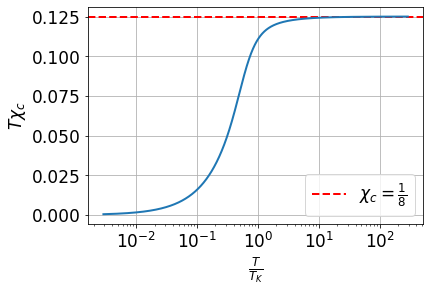

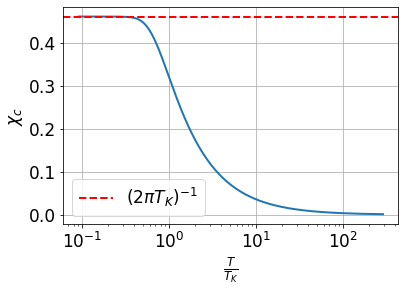

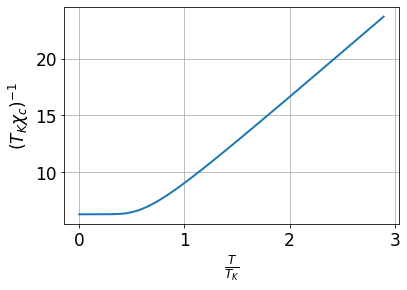

100%|██████████| 2000/2000 [00:00<00:00, 122459.64it/s]


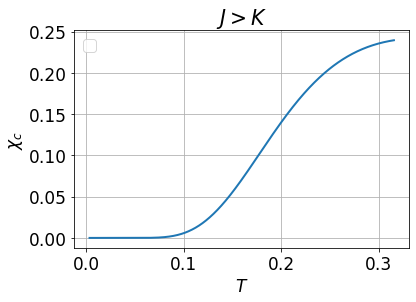

In [28]:
def get_chi_c(ed, j, k, T):
    beta = 1/T
    numerator = (2 * exp(-beta * ed) + exp(-beta * (k/4))) * beta/2 + exp(beta * (k/4 - ed)) * sinh(beta * k/2) / k
    denominator = 4 + 2 * exp(-beta * k/4) + 4 * exp(-beta * ed) + 3 * exp(-beta*(ed + j/4)) + exp(beta * (3*j/4 - ed)) + 2 * exp(beta * (k/4 - ed)) * cosh(beta * k/2)
    # print (numerator, denominator)
    return numerator/denominator


V = 0.019909015762077577
K = 0.15838964056748835
J = 0.015
U = 0
count = 1
D = count / 10

U =  -0.32105726520158306
J =  0
K =  0.18095487684134437
V =  0.007223916024043162
count = 3

N = 2 * count
j = J * N
k = K * N
v = V * sqrt(N)
T_range = 10**np.arange(-3, 2, 0.001)
ed = -U/2
data = itertools.product([ed],[j],[k], T_range)
print (get_chi_c(ed,j,k,T_range[0]))
chi_c = []
for T in tqdm(T_range):
    chi_c.append(get_chi_c(ed, j, k, T))
chi_c = np.array(chi_c)
Tk = (j + k) / (np.pi)
plt.axhline(1/8, 0, 1, color="r", label=r"$\chi_c = \frac{1}{8}$", ls="--")
plt.plot((T_range/Tk), T_range * chi_c)
plt.xscale("log")
plt.legend()
plt.ylabel(r"$T \chi_c$")
plt.xlabel(r"$\frac{T}{T_K}$")
plt.show()

plt.plot((T_range/Tk)[np.where(T_range>10**(-1.5))], chi_c[np.where(T_range>10**(-1.5))])
plt.xscale("log")
plt.axhline(1/(2*np.pi*Tk), 0, 1, color="r", label=r"$\left(2\pi T_K\right)^{-1}$", ls="--")
plt.ylabel(r"$\chi_c$")
plt.xlabel(r"$\frac{T}{T_K}$")
plt.legend()
plt.show()

plt.plot((T_range/Tk)[np.where(T_range<1)], 1/(Tk * chi_c)[np.where(T_range<1)])
plt.ylabel(r"$\left(T_K \chi_c\right)^{-1}$")
plt.xlabel(r"$\frac{T}{T_K}$")
plt.show()



D = 0.2999999999999998
U = 0
J = 0.18095487684134437
K = 0.01
V = 0.7941243949155348
count= 3
N = 2 * count
j = J * N
k = K * N
v = V * sqrt(N)
T_range = 10**np.arange(-2.5, -0.5, 0.001)
ed = -U/2
data = itertools.product([ed],[j],[k], T_range)
chi_c = []
for T in tqdm(T_range):
    chi_c.append(get_chi_c(ed, j, k, T))
chi_c = np.array(chi_c)
plt.plot(T_range, chi_c)
# plt.xscale("log")
plt.ylabel(r"$\chi_c$")
plt.title(r"$J > K$")
plt.xlabel(r"$T$")
plt.legend()
plt.show()



## Exact Diagonalization

In [2]:
def imp_energy(Ek_0, V, J, K, U):
    dim = len(Ek_0)
    ed = -U/2
    imp_ed_up = [create(2)*destroy(2), identity(2)]
    imp_ed_dn = [identity(2), create(2)*destroy(2)]
    imp_U = [create(2)*destroy(2), create(2)*destroy(2)]
    bath = [identity(2)]*2*dim
    return ed*tensor(imp_ed_up+bath) + ed*tensor(imp_ed_dn+bath) + U*tensor(imp_U+bath)


def kin_en(Ek_0, V, J, K, U):
    H = 0
    dim = len(Ek_0)
    for i in range(dim):
        for sigma in ["u", "d"]:
            # print (i, sigma)
            imp = [identity(2)]*2
            bef = [identity(2)]*2*i
            tau = create(2)*destroy(2) - 1/2
            curr = [Ek_0[i]*tau, identity(2)] if sigma == "u" else [identity(2), Ek_0[i]*tau]
            aft = [identity(2)]*2*(dim - i - 1)
            mats = imp+bef+curr+aft
            H += tensor(mats)
    return H


def hyb(Ek_0, V, J, K, U):
    H = 0
    dim = len(Ek_0)
    for i in range(dim):
        for sigma in ["u", "d"]:
            # print (i, sigma)
            tau = create(2)*destroy(2) - 1/2
            if sigma == "u":
                mats1 = [destroy(2), identity(2)] + [identity(2)]*2*i + [create(2), identity(2)] + [identity(2)]*2*(dim - i - 1)
                mats2 = [create(2), identity(2)] + [identity(2)]*2*i + [destroy(2), identity(2)] + [identity(2)]*2*(dim - i - 1)
            else:
                mats1 = [identity(2), destroy(2)] + [identity(2)]*2*i + [identity(2), create(2)] + [identity(2)]*2*(dim - i - 1)
                mats2 = [identity(2), create(2)] + [identity(2)]*2*i + [identity(2), destroy(2)] + [identity(2)]*2*(dim - i - 1)
            H += -tensor(mats1) + tensor(mats2)
    return V * H
    
    
def spin(Ek_0, V, J, K, U):
    H = 0
    dim = len(Ek_0)
    idt = identity(2)
    Sdz = 0.5 * (tensor(create(2)*destroy(2), identity(2)) - tensor(identity(2), create(2)*destroy(2)))
    Sdplus = tensor(create(2), destroy(2))
    Sdmin = -tensor(destroy(2), create(2))
    Ksz = Ksplus = Ksmin = 0
    for i,j in product(range(dim), range(dim)):
        # print (i,j)
        if i < j:
            Ksz += 0.5 * tensor([idt]*2*i + [create(2), idt] + [idt]*2*(j - i - 1) + [destroy(2), idt] + [idt]*2*(dim - j - 1))
            Ksz -= 0.5 * tensor([idt]*2*i + [idt, create(2)] + [idt]*2*(j - i - 1) + [idt, destroy(2)] + [idt]*2*(dim - j - 1))
            Ksplus += tensor([idt]*2*i + [create(2), idt] + [idt]*2*(j - i - 1) + [idt, destroy(2)] + [idt]*2*(dim - j - 1))
            Ksmin += tensor([idt]*2*i + [idt, destroy(2)] + [idt]*2*(j - i - 1) + [create(2), idt] + [idt]*2*(dim - j - 1))
        elif i > j:
            Ksz -= 0.5 * tensor([idt]*2*j + [destroy(2), idt] + [idt]*2*(i - j - 1) + [create(2), idt] + [idt]*2*(dim - i - 1))
            Ksz += 0.5 * tensor([idt]*2*j + [idt, destroy(2)] + [idt]*2*(i - j - 1) + [idt, create(2)] + [idt]*2*(dim - i - 1))
            Ksplus -= tensor([idt]*2*j + [idt, destroy(2)] + [idt]*2*(i - j - 1) + [create(2), idt] + [idt]*2*(dim - i - 1))
            Ksmin -= tensor([idt]*2*j + [create(2), idt] + [idt]*2*(i - j - 1) + [idt, destroy(2)] + [idt]*2*(dim - i - 1))
        else:
            Ksz += 0.5 * tensor([idt]*2*i + [create(2)*destroy(2), idt] + [idt]*2*(dim - i - 1))
            Ksz -= 0.5 * tensor([idt]*2*i + [idt, create(2)*destroy(2)] + [idt]*2*(dim - i - 1))
            Ksplus += tensor([idt]*2*i + [create(2), destroy(2)] + [idt]*2*(dim - i - 1))
            Ksmin -= tensor([idt]*2*i + [destroy(2), create(2)] + [idt]*2*(dim - i - 1))

    return J * (tensor(Sdz, Ksz) + 0.5*tensor(Sdplus, Ksmin) + 0.5*tensor(Sdmin, Ksplus))


def charge(Ek_0, V, J, K, U):
    H = 0
    dim = len(Ek_0)
    idt = identity(2)
    Cdz = 0.5 * (tensor(create(2)*destroy(2), identity(2)) + tensor(identity(2), create(2)*destroy(2)) - 1)
    Cdplus = tensor(create(2), create(2))
    Cdmin = -tensor(destroy(2), destroy(2))
    Kcz = -dim/2
    Kcplus = Kcmin = 0
    for i,j in product(range(dim), range(dim)):
        # print (i,j)
        if i < j:
            Kcz += 0.5 * tensor([idt]*2*i + [create(2), idt] + [idt]*2*(j - i - 1) + [destroy(2), idt] + [idt]*2*(dim - j - 1))
            Kcz += 0.5 * tensor([idt]*2*i + [idt, create(2)] + [idt]*2*(j - i - 1) + [idt, destroy(2)] + [idt]*2*(dim - j - 1))
            Kcplus += tensor([idt]*2*i + [create(2), idt] + [idt]*2*(j - i - 1) + [idt, create(2)] + [idt]*2*(dim - j - 1))
            Kcmin += tensor([idt]*2*i + [idt, destroy(2)] + [idt]*2*(j - i - 1) + [destroy(2), idt] + [idt]*2*(dim - j - 1))
        elif i > j:
            Kcz -= 0.5 * tensor([idt]*2*j + [destroy(2), idt] + [idt]*2*(i - j - 1) + [create(2), idt] + [idt]*2*(dim - i - 1))
            Kcz -= 0.5 * tensor([idt]*2*j + [idt, destroy(2)] + [idt]*2*(i - j - 1) + [idt, create(2)] + [idt]*2*(dim - i - 1))
            Kcplus -= tensor([idt]*2*j + [idt, create(2)] + [idt]*2*(i - j - 1) + [create(2), idt] + [idt]*2*(dim - i - 1))
            Kcmin -= tensor([idt]*2*j + [destroy(2), idt] + [idt]*2*(i - j - 1) + [idt, destroy(2)] + [idt]*2*(dim - i - 1))
        else:
            Kcz += 0.5 * tensor([idt]*2*i + [create(2)*destroy(2), idt] + [idt]*2*(dim - i - 1))
            Kcz += 0.5 * tensor([idt]*2*i + [idt, create(2)*destroy(2)] + [idt]*2*(dim - i - 1))
            Kcplus += tensor([idt]*2*i + [create(2), create(2)] + [idt]*2*(dim - i - 1))
            Kcmin -= tensor([idt]*2*i + [destroy(2), destroy(2)] + [idt]*2*(dim - i - 1))

    return K * (tensor(Cdz, Kcz) + 0.5*tensor(Cdplus, Kcmin) + 0.5*tensor(Cdmin, Kcplus))

100%|██████████| 1000/1000 [00:00<00:00, 4656.30it/s]


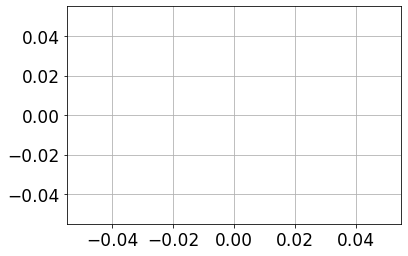

In [6]:
Ek_0 = np.array([-0.1, 0, 0.1])
dim = len(Ek_0)

U = 0
V = 0.4457474905806519
J = 0.2155423683094237
K = 0.02214849165301451
ed = -U/2


H = 0
H += kin_en(Ek_0, V, J, K, U)
H += imp_energy(Ek_0, V, J, K, U)
H += hyb(Ek_0, V, J, K, U)
H += spin(Ek_0, V, J, K, U)
H += charge(Ek_0, V, J, K, U)
H = 0.5 * (H + H.dag())
vals, vecs = H.eigenstates()
imp_up = [create(2)*destroy(2), identity(2)]
imp_dn = [identity(2), create(2)*destroy(2)]
imp_updn = [create(2)*destroy(2), create(2)*destroy(2)]
bath = [identity(2)]*2*dim
Sz_sq_op = 0.25*(tensor(imp_up+bath) + tensor(imp_dn+bath) - 2*tensor(imp_updn+bath))
Sz_sq_arr = np.array([np.real((ket.dag() * Sz_sq_op * ket)[0][0][0]) for ket in vecs])

H0 = 0
H0 += kin_en(Ek_0, V, J, K, U)
H0 += imp_energy(Ek_0, V, J, K, U)
vals0, vecs0 = H0.eigenstates()
Sz_sq_arr0 = np.array([np.real((ket.dag() * Sz_sq_op * ket)[0][0][0]) for ket in vecs0])

Trange = 10**np.linspace(-3, 3, 1000, endpoint=True, dtype=float)
susc_J = []
for T in tqdm(Trange):
    kB = 10**(-5)
    beta = 1/(kB * T)
    Z = sum(np.exp(-vals * beta))
    Z0 = sum(np.exp(-vals0 * beta))
    susc_J.append(beta*sum(Sz_sq_arr*np.exp(-beta*vals))/Z - beta*sum(Sz_sq_arr0*np.exp(-beta*vals0))/Z0 + 1/8) #- beta * sum() / Z

plt.plot(Trange, susc_J)
plt.show()